In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "gHLqjBEtV9FwPEYoPY7reAyvL"
consumer_secret = "gMAfuuI13GCSKGZxO3PF9ZR5sDFTghq44Uuw3Ece5hs9OTSC9z"
access_token = "977543336377581568-xnRHASGqgdszCGzvHgYquWL2hjkEXZS"
access_token_secret = "ZYZz0sorPDL3tuafQWCEDWIDAn4uqi0c8gszGq7HefTLS"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
sentiments = []
target_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"]

In [4]:
for user in target_list:
    counter = 1
    for page in range(5):
        tweets = api.user_timeline(user,page=page+1)
        for tweet in tweets:
            com = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            sentiments.append({"Date": tweet["created_at"],
                               "User": user,
                               "Text": tweet["text"],
                               "Compound": com,
                               "Positive": pos,
                               "Neutral": neu,
                               "Negative": neg,
                               "Tweets Ago": counter})
            counter = counter + 1

In [5]:
sent_df = pd.DataFrame.from_dict(sentiments)
sent_df = sent_df[["User","Date","Tweets Ago","Compound","Positive","Neutral","Negative","Text"]]
sent_df.to_csv("output.csv")
sent_df

User                            Date  Tweets Ago  Compound  Positive  \
0        @BBC  Thu Mar 29 20:41:00 +0000 2018           1   -0.2960     0.000   
1        @BBC  Thu Mar 29 18:45:08 +0000 2018           2    0.0000     0.000   
2        @BBC  Thu Mar 29 18:44:20 +0000 2018           3    0.0000     0.000   
3        @BBC  Thu Mar 29 18:44:11 +0000 2018           4    0.0000     0.000   
4        @BBC  Thu Mar 29 18:43:51 +0000 2018           5    0.0000     0.000   
5        @BBC  Thu Mar 29 18:05:02 +0000 2018           6    0.4522     0.194   
6        @BBC  Thu Mar 29 17:04:05 +0000 2018           7    0.0000     0.000   
7        @BBC  Thu Mar 29 16:12:19 +0000 2018           8    0.7840     0.288   
8        @BBC  Thu Mar 29 16:03:03 +0000 2018           9   -0.3164     0.000   
9        @BBC  Thu Mar 29 15:41:25 +0000 2018          10    0.0000     0.000   
10       @BBC  Thu Mar 29 15:31:22 +0000 2018          11    0.0000     0.000   
11       @BBC  Thu Mar 29 15:26:27 +0000 2018          12    0.0000     0.000   
12       @BBC  Thu Mar 29 15:24:08 +0000 2018          13    0.0000     0.000   
13       @BBC  Thu Mar 29 15:04:02 +0000 2018          14    0.0000     0.000   
14       @BBC  Thu Mar 29 14:21:11 +0000 2018          15    0.0000     0.000   
15       @BBC  Thu Mar 29 14:07:48 +0000 2018          16    0.0000     0.000   
16       @BBC  Thu Mar 29 12:31:03 +0000 2018          17    0.8268     0.299   
17       @BBC  Thu Mar 29 11:00:21 +0000 2018          18   -0.6249     0.124   
18       @BBC  Thu Mar 29 10:18:02 +0000 2018          19    0.6908     0.231   
19       @BBC  Thu Mar 29 08:00:12 +0000 2018          20    0.7840     0.345   
20       @BBC  Thu Mar 29 07:27:07 +0000 2018          21    0.0000     0.000   
21       @BBC  Thu Mar 29 07:00:10 +0000 2018          22    0.0000     0.000   
22       @BBC  Wed Mar 28 18:00:05 +0000 2018          23    0.0000     0.000   
23       @BBC  Wed Mar 28 17:00:12 +0000 2018          24    0.2960     0.109   
24       @BBC  Wed Mar 28 16:30:00 +0000 2018          25   -0.8225     0.000   
25       @BBC  Wed Mar 28 16:00:10 +0000 2018          26    0.0000     0.000   
26       @BBC  Wed Mar 28 15:35:27 +0000 2018          27    0.7506     0.280   
27       @BBC  Wed Mar 28 13:32:04 +0000 2018          28    0.0000     0.000   
28       @BBC  Wed Mar 28 12:26:01 +0000 2018          29   -0.3182     0.000   
29       @BBC  Wed Mar 28 11:50:54 +0000 2018          30    0.0000     0.000   
..        ...                             ...         ...       ...       ...   
470  @NYTimes  Thu Mar 29 11:30:09 +0000 2018          71    0.0000     0.000   
471  @NYTimes  Thu Mar 29 11:14:03 +0000 2018          72    0.8020     0.325   
472  @NYTimes  Thu Mar 29 10:59:02 +0000 2018          73    0.0000     0.000   
473  @NYTimes  Thu Mar 29 10:44:04 +0000 2018          74    0.0000     0.000   
474  @NYTimes  Thu Mar 29 10:30:08 +0000 2018          75    0.0000     0.000   
475  @NYTimes  Thu Mar 29 10:16:01 +0000 2018          76    0.0000     0.000   
476  @NYTimes  Thu Mar 29 10:00:19 +0000 2018          77    0.0000     0.000   
477  @NYTimes  Thu Mar 29 09:44:04 +0000 2018          78   -0.4588     0.000   
478  @NYTimes  Thu Mar 29 09:30:11 +0000 2018          79   -0.4767     0.000   
479  @NYTimes  Thu Mar 29 09:15:04 +0000 2018          80   -0.8625     0.000   
480  @NYTimes  Thu Mar 29 09:00:12 +0000 2018          81    0.2960     0.115   
481  @NYTimes  Thu Mar 29 08:45:03 +0000 2018          82   -0.6908     0.000   
482  @NYTimes  Thu Mar 29 08:30:08 +0000 2018          83    0.0000     0.000   
483  @NYTimes  Thu Mar 29 08:14:03 +0000 2018          84    0.6908     0.263   
484  @NYTimes  Thu Mar 29 08:02:06 +0000 2018          85   -0.2960     0.000   
485  @NYTimes  Thu Mar 29 07:47:05 +0000 2018          86   -0.5423     0.000   
486  @NYTimes  Thu Mar 29 07:32:06 +0000 2018          87   -0.6369     0.000   
487  @NYTimes  Thu Mar 29 07:26:50 +0000

In [13]:
BBC_df = sent_df.groupby(["User"]).get_group("@BBC")
CBS_df = sent_df.groupby(["User"]).get_group("@CBS")
CNN_df = sent_df.groupby(["User"]).get_group("@CNN")
FOX_df = sent_df.groupby(["User"]).get_group("@FoxNews")
NYT_df = sent_df.groupby(["User"]).get_group("@NYTimes")

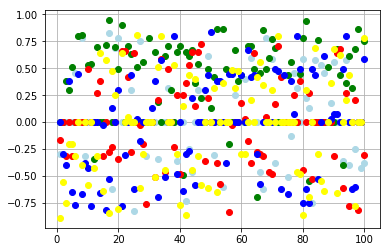

In [29]:
plt.plot(BBC_df["Tweets Ago"],BBC_df["Compound"],marker="o",linewidth=0,color="lightblue")
plt.plot(CBS_df["Tweets Ago"],CBS_df["Compound"],marker="o",linewidth=0,color="green")
plt.plot(CNN_df["Tweets Ago"],CNN_df["Compound"],marker="o",linewidth=0,color="red")
plt.plot(FOX_df["Tweets Ago"],FOX_df["Compound"],marker="o",linewidth=0,color="blue")
plt.plot(NYT_df["Tweets Ago"],NYT_df["Compound"],marker="o",linewidth=0,color="yellow")
plt.grid()
plt.show()
#add legend and labels etc